In [1]:
from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, display_angle_predictions
from data.street_view import get_filenames

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## Load file names

In [2]:
street_view_dir = os.path.join('..', 'data', 'street_view')

if os.path.exists(street_view_dir):
    test_filenames = get_files('data/photos/train_gen')
else:
    test_examples_path = os.path.join('..', 'data', 'photos', 'train_gen')
    test_filenames = [
        os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)
    ]

#print(test_filenames)

## Load model

In [3]:
model_location = os.path.join('..', 'models', 'rotnet_image_resnet50.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

## Evaluate model

In [4]:
batch_size = 64
out = model.evaluate(
    RotNetDataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func=preprocess_input,
        crop_center=True,
        crop_largest_rect=True,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

23/22 [==============================] - 488s 21s/step
Test loss: 3.5319478511810303
Test angle error: 65.66576385498047


## Display examples

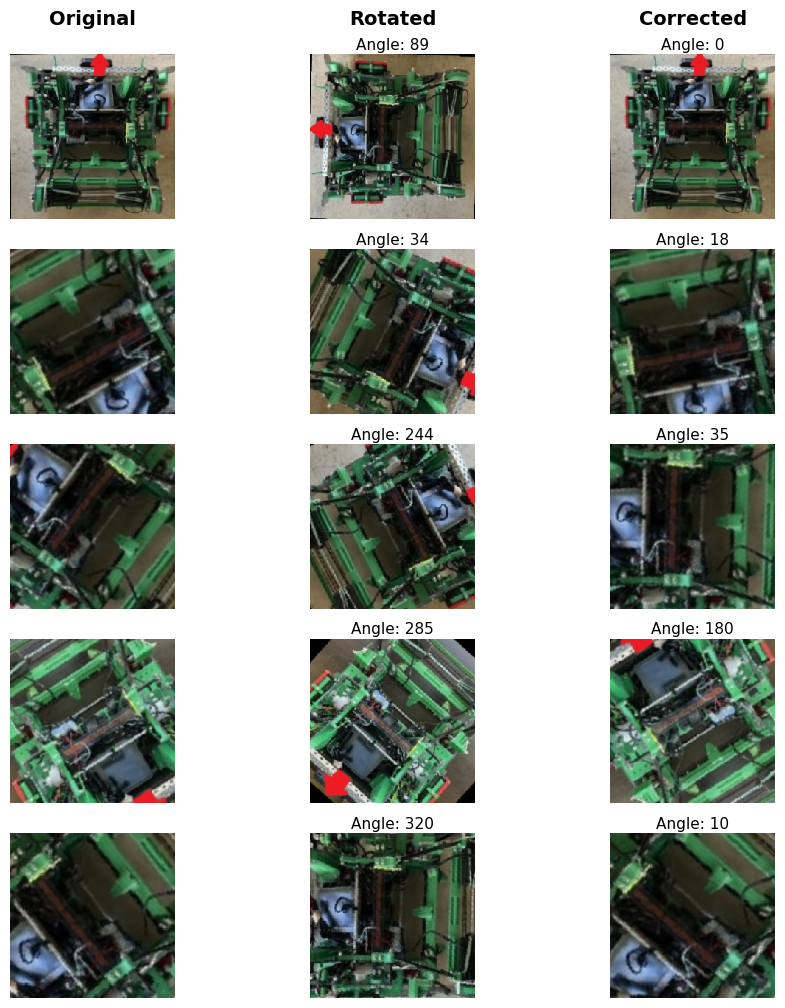

In [7]:
num_images = 5

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)

## Image Orientation Detection

In [40]:
street_view_dir = os.path.join('..', 'data', 'street_view')

if os.path.exists(street_view_dir):
    test_filenames = get_files('data/photos/train_resized_marked')
else:
    test_examples_path = os.path.join('..', 'data', 'photos', 'train_resized_marked')
    test_filenames = [
        os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)
    ]

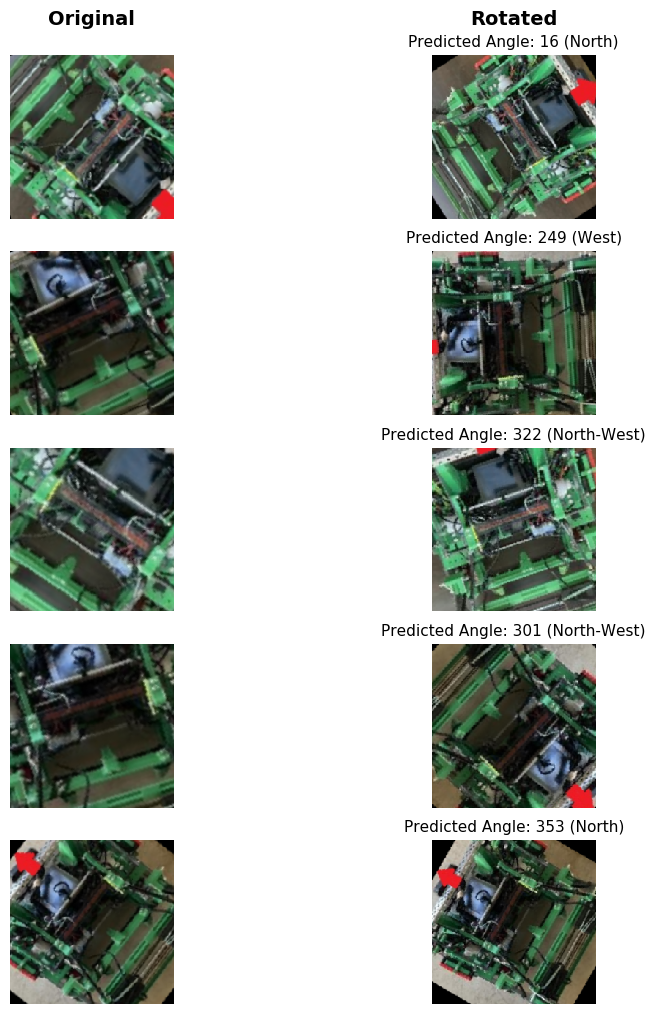

In [6]:
num_images = 5

display_angle_predictions(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)